In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read from rating.csv file
df = pd.read_csv('rating.csv')
df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [3]:
# read from anime.csv file
anime = pd.read_csv('anime.csv')
anime['name']=anime['name'].map(lambda x: x.replace('&quot;', ''))
# show the table
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
# combining both datasets to get a new one with all the columns except anime.csv rating
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')

In [5]:
# Show the table
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


In [6]:
# checking anime by rating
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
STAR BEAT!: Hoshi no Kodou                                          10.000000
Choegang Top Plate                                                  10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Shiroi Zou                                                          10.000000
Tang Lang Bu Chan                                                    9.000000
Doukyuusei                                                           9.000000
Shiranpuri                                                           9.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

In [7]:
# checking anime rating by number of users
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [8]:
# Exploratory data analysis
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

In [9]:
genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [10]:
# ratings = ratings.reset_index(level=0)

In [11]:
# show the table
ratings.head()

,rating,num of ratings
name,,
.hack//G.U. Returner,4.804110,730
.hack//G.U. Trilogy,5.347943,1118
.hack//G.U. Trilogy: Parody Mode,4.589235,353
.hack//Gift,4.675581,860
.hack//Intermezzo,5.037158,915


(0.0, 3000.0)

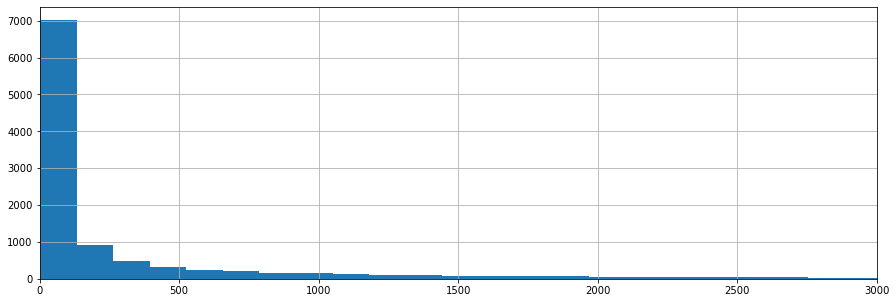

In [12]:
# Checking anime ratings distribution
plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)

<AxesSubplot:>

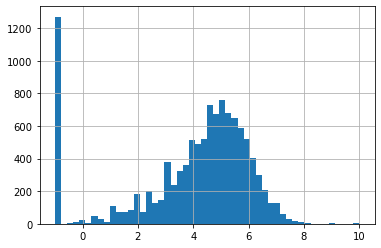

In [13]:
ratings['rating'].hist(bins=50)

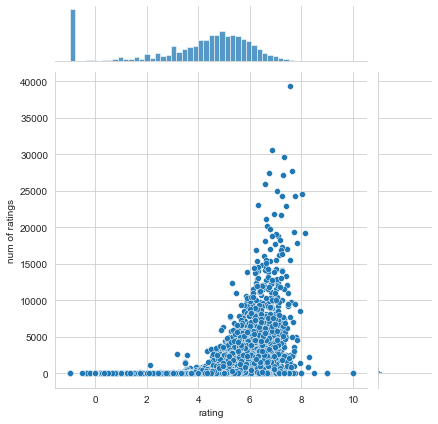

In [14]:
sns.set_style('whitegrid')
%matplotlib inline
sns.jointplot(x='rating',y='num of ratings',data=ratings)

In [15]:
# defining the method for getting the genre
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
    
def get_recommendation(name):
    #generating the list of anime with the same genre
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    #creating a matrix based on the generated list
    animemat = df[df['name'].isin(cols)].pivot_table(
        index='user_id',columns='name',values='rating')
       
    #creating a correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values(
        'correlation',ascending=False)
    
    return corr_anime.head(10)

In [18]:
get_recommendation('Dragon Ball')

C:\Users\Hamza\anaconda3\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Hamza\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Dragon Ball,1.000000,14117
Dragon Ball Z,0.863344,17032
Dragon Ball GT,0.821684,11079
Digimon Adventure,0.739468,9395
Shijou Saikyou no Deshi Kenichi,0.720453,5654
Digimon Adventure 02,0.718857,6670
InuYasha,0.706964,9328
Yuu☆Yuu☆Hakusho,0.702228,6764
Beelzebub,0.701499,5871
